In [1]:
!pip uninstall -y torch
!pip install torch==2.1.0+cpu torchvision==0.16.0+cpu torchaudio==2.1.0 -f https://download.pytorch.org/whl/torch_stable.html


ERROR: Operation cancelled by user
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.9/184.9 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.6 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.6.0+cu124
    Uninstalling torch-2.6.0+cu124:
      Successfully uninstalled torch-2.6.0+cu124
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.21.0+cu124
    Uninstalling torchvision-0.21.0+cu124:
      Successfully uninstalled torchvision-0.21.0+cu124
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 2.6.0+cu124
    Uninstalling torchaudio-2.6.0+cu124:
      Successfully uninstalled torchaudio-2.6.0+cu124


In [2]:
!pip install scipy==1.10.1
#srestart after

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 21.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires scipy>=1.11.1, but you have scipy 1.10.1 which is incompatible.
xarray-einstats 0.9.0 requires scipy>=1.11, but you have scipy 1.10.1 which is incompatible.
cvxpy 1.6.5 requires scipy>=1.

In [1]:
!pip install geoopt torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.1/90.1 kB 2.5 MB/s eta 0:00:00


In [2]:

!git clone https://github.com/eamid/trimap.git

!pip install /content/trimap


Cloning into 'trimap'...
remote: Enumerating objects: 397, done.
remote: Counting objects: 100% (71/71), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 397 (delta 36), reused 27 (delta 11), pack-reused 326 (from 1)
Receiving objects: 100% (397/397), 24.34 MiB | 22.91 MiB/s, done.
Resolving deltas: 100% (198/198), done.
Processing ./trimap
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for trimap: filename=trimap-1.1.4-py3-none-any.whl size=15438 sha256=39d6f07b42c4281cba865f64835df74b9aec6406dd0b6d743cd1f68adfe0f1d7
  Stored in directory: /tmp/pip-ephem-wheel-cache-xfw_t_jy/wheels/e5/2d/9a/6c7d4fe8168c2cb4ec3f8b0d0d6037334f00d20155ea8c245e
  Created wheel for annoy: filename=annoy-1.17.3-cp311-cp311-linux_x86_64.whl size=553319 sha256=c0bd02d2f6f8427326ff1adf28d47f02371e0ce810fc94d61acbcac428284c9c
  Stored in directory: /root/.cache/

In [3]:
# poincare_pipeline.py

import numpy as np
import torch
import torch.nn as nn
import geoopt
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import nltk
from nltk.corpus import wordnet as wn
import os
import random

# Setup
SEED = 42
np.random.seed(SEED)
torch.manual_seed(SEED)
random.seed(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

nltk.download('wordnet')

os.makedirs("embeddings", exist_ok=True)
os.makedirs("losses", exist_ok=True)

# Load MNIST
(X, y), (_, _) = mnist.load_data()
X = X[:1000].reshape(-1, 28 * 28).astype(np.float32) / 255.0
y = y[:1000]

scaler = StandardScaler()
X = scaler.fit_transform(X)

#  Dimensionality Reduction
def reduce_dim(X, method="trimap"):
    if method == "pca":
        return PCA(n_components=2).fit_transform(X)
    elif method == "tsne":
        return TSNE(n_components=2, random_state=SEED).fit_transform(X)
    elif method == "umap":
        return umap.UMAP(n_components=2, random_state=SEED).fit_transform(X)
    elif method == "trimap":
        from trimap import TRIMAP
        return TRIMAP(n_dims=2).fit_transform(X)
    else:
        raise ValueError(f"Unknown method: {method}")

#  Generate Semantic Triplets
try:
    digit_synsets = [wn.synsets(str(i), pos='n')[0] for i in range(10)]
except IndexError as e:
    raise RuntimeError("WordNet failed to return synsets for one or more digits") from e

triplets = []
for i in range(len(y)):
    for j in range(i + 1, len(y)):
        if y[i] == y[j] or (y[i] % 2 == y[j] % 2):
            syn_i = digit_synsets[y[i]]
            syn_j = digit_synsets[y[j]]
            if set(syn_i.hypernyms()) & set(syn_j.hypernyms()):
                k_candidates = np.where((y != y[i]) & (y != y[j]))[0]
                if len(k_candidates) > 0:
                    k = np.random.choice(k_candidates)
                    triplets.append((i, j, k))

triplets = torch.tensor(triplets)

#  Train Poincaré Embedding
def train_poincare_embedding(X_reduced, method):
    manifold = geoopt.PoincareBall(c=1.0)
    embed = geoopt.ManifoldParameter(
        manifold.random_normal((len(X_reduced), 2), std=0.1),
        manifold=manifold
    )

    optimizer = geoopt.optim.RiemannianAdam([embed], lr=1e-2)
    loss_fn = nn.TripletMarginLoss(margin=0.2, p=2)

    losses = []
    for epoch in range(1000):
        optimizer.zero_grad()
        anchor = embed[triplets[:, 0]]
        pos = embed[triplets[:, 1]]
        neg = embed[triplets[:, 2]]
        loss = loss_fn(anchor, pos, neg)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

        if epoch % 100 == 0:
            print(f"[{method.upper()}] Epoch {epoch} - Loss: {loss.item():.4f}")

    emb_np = embed.detach().cpu().numpy()
    np.save(f"embeddings/poincare_embedding_{method}.npy", emb_np)
    np.save(f"losses/training_loss_{method}.npy", np.array(losses))
    print(f"Saved embedding and loss for {method}")

# Run Full Pipeline
methods = ["pca", "tsne", "umap", "trimap"]

for method in methods:
    print(f"--- Processing {method.upper()} ---")
    X_2d = reduce_dim(X, method)
    np.save(f"embeddings/original_embedding_{method}.npy", X_2d)
    train_poincare_embedding(X_2d, method)

print("\nAll methods processed and saved.")


[nltk_data] Downloading package wordnet to /root/nltk_data...


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
--- Processing PCA ---
[PCA] Epoch 0 - Loss: 0.2001
[PCA] Epoch 100 - Loss: 0.0747
[PCA] Epoch 200 - Loss: 0.0645
[PCA] Epoch 300 - Loss: 0.0623
[PCA] Epoch 400 - Loss: 0.0604
[PCA] Epoch 500 - Loss: 0.0589
[PCA] Epoch 600 - Loss: 0.0579
[PCA] Epoch 700 - Loss: 0.0571
[PCA] Epoch 800 - Loss: 0.0564
[PCA] Epoch 900 - Loss: 0.0560
Saved embedding and loss for pca
--- Processing TSNE ---
[TSNE] Epoch 0 - Loss: 0.2004
[TSNE] Epoch 100 - Loss: 0.0717
[TSNE] Epoch 200 - Loss: 0.0653
[TSNE] Epoch 300 - Loss: 0.0628
[TSNE] Epoch 400 - Loss: 0.0608
[TSNE] Epoch 500 - Loss: 0.0591
[TSNE] Epoch 600 - Loss: 0.0579
[TSNE] Epoch 700 - Loss: 0.0570
[TSNE] Epoch 800 - Loss: 0.0565
[TSNE] Epoch 900 - Loss: 0.0560
Saved embedding and loss for tsne
--- Processing UMAP ---


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[UMAP] Epoch 0 - Loss: 0.2003
[UMAP] Epoch 100 - Loss: 0.0743
[UMAP] Epoch 200 - Loss: 0.0664
[UMAP] Epoch 300 - Loss: 0.0632
[UMAP] Epoch 400 - Loss: 0.0611
[UMAP] Epoch 500 - Loss: 0.0595
[UMAP] Epoch 600 - Loss: 0.0583
[UMAP] Epoch 700 - Loss: 0.0574
[UMAP] Epoch 800 - Loss: 0.0565
[UMAP] Epoch 900 - Loss: 0.0559
Saved embedding and loss for umap
--- Processing TRIMAP ---
[TRIMAP] Epoch 0 - Loss: 0.2004
[TRIMAP] Epoch 100 - Loss: 0.0712
[TRIMAP] Epoch 200 - Loss: 0.0644
[TRIMAP] Epoch 300 - Loss: 0.0623
[TRIMAP] Epoch 400 - Loss: 0.0605
[TRIMAP] Epoch 500 - Loss: 0.0593
[TRIMAP] Epoch 600 - Loss: 0.0583
[TRIMAP] Epoch 700 - Loss: 0.0577
[TRIMAP] Epoch 800 - Loss: 0.0571
[TRIMAP] Epoch 900 - Loss: 0.0567
Saved embedding and loss for trimap

All methods processed and saved.


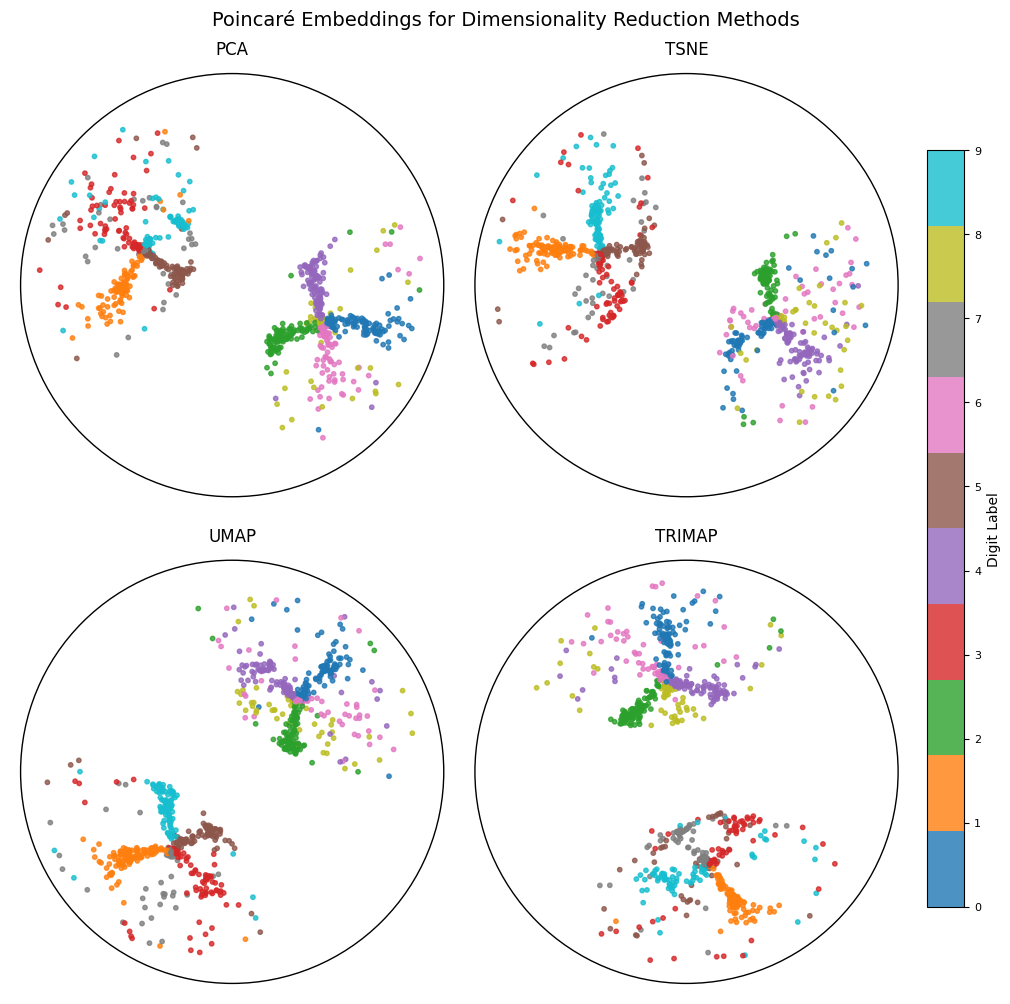

In [4]:
#visualziations after training

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load MNIST labels (match the 1000 used in training)
(_, y), _ = mnist.load_data()
y = y[:1000]

methods = ["pca", "tsne", "umap", "trimap"]
fig, axs = plt.subplots(2, 2, figsize=(10, 10), constrained_layout=True)
axs = axs.flatten()

for i, method in enumerate(methods):
    try:
        emb = np.load(f"embeddings/poincare_embedding_{method}.npy")
        assert len(emb) == len(y), f"Mismatch: embedding has {len(emb)}, labels have {len(y)}"

        ax = axs[i]
        ax.set_title(method.upper(), fontsize=12)
        ax.set_xlim(-1.05, 1.05)
        ax.set_ylim(-1.05, 1.05)
        ax.set_aspect('equal')
        ax.axis('off')

        # Draw Poincaré disk
        circle = plt.Circle((0, 0), 1, color='black', fill=False, linewidth=1)
        ax.add_artist(circle)

        # Scatter plot with color labels
        scatter = ax.scatter(
            emb[:, 0], emb[:, 1],
            c=y, cmap='tab10', s=10, alpha=0.8
        )

    except Exception as e:
        print(f"Could not load {method}: {e}")
        axs[i].set_title(f"{method.upper()} (Error)")

# Add colorbar outside the plot (right side)
cbar = fig.colorbar(
    scatter, ax=axs, orientation='vertical',
    fraction=0.05, pad=0.02, shrink=0.8,
    location='right'
)
cbar.set_label('Digit Label', fontsize=10)
cbar.ax.tick_params(labelsize=8)

plt.suptitle("Poincaré Embeddings for Dimensionality Reduction Methods", fontsize=14)
plt.show()


In [ ]:
#scores

In [5]:
import numpy as np
from sklearn.metrics import silhouette_score, davies_bouldin_score, pairwise_distances
from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import trustworthiness
from scipy.stats import spearmanr
from tensorflow.keras.datasets import mnist

# Load MNIST labels
(_, y), _ = mnist.load_data()
y = y[:1000]

methods = ["pca", "tsne", "umap", "trimap"]
results = {}

def mean_intra_inter_ratio(embedding, labels):
    dists = pairwise_distances(embedding)
    intra, inter = [], []
    for i in range(len(labels)):
        for j in range(i + 1, len(labels)):
            if labels[i] == labels[j]:
                intra.append(dists[i, j])
            else:
                inter.append(dists[i, j])
    intra = np.mean(intra)
    inter = np.mean(inter)
    return inter / intra if intra > 0 else 0

for method in methods:
    try:
        emb_orig = np.load(f"embeddings/original_embedding_{method}.npy")
        emb = np.load(f"embeddings/poincare_embedding_{method}.npy")

        scores = {}

        for name, embedding in [("before", emb_orig), ("after", emb)]:
            silhouette = silhouette_score(embedding, y)
            db_index = davies_bouldin_score(embedding, y)
            knn = KNeighborsClassifier(n_neighbors=5)
            knn.fit(embedding, y)
            acc = np.mean(knn.predict(embedding) == y)
            global_score = mean_intra_inter_ratio(embedding, y)
            scores[f"silhouette_{name}"] = silhouette
            scores[f"db_index_{name}"] = db_index
            scores[f"knn_acc_{name}"] = acc
            scores[f"global_score_{name}"] = global_score

        # Only compute these for 'after' embedding
        high_dist = pairwise_distances(emb_orig)
        low_dist = pairwise_distances(emb)
        stress = np.sqrt(np.sum((high_dist - low_dist)**2) / np.sum(high_dist**2))
        flat_high = high_dist[np.triu_indices_from(high_dist, k=1)]
        flat_low = low_dist[np.triu_indices_from(low_dist, k=1)]
        spearman_corr = spearmanr(flat_high, flat_low).correlation
        trust = trustworthiness(emb_orig, emb, n_neighbors=5)

        scores["stress"] = stress
        scores["spearman_corr"] = spearman_corr
        scores["trustworthiness"] = trust

        results[method] = scores

    except Exception as e:
        results[method] = {"error": str(e)}
        print(f"Error in {method}: {e}")

# Print results in a neat table
print("\nEvaluation Metrics Before and After Poincaré Embedding (2D):\n")
header = f"{'Method':<8} | {'Silh. (B)':>8} | {'Silh. (A)':>8} | {'DB (B)':>7} | {'DB (A)':>7} | " \
         f"{'kNN (B)':>8} | {'kNN (A)':>8} | {'Glob. (B)':>9} | {'Glob. (A)':>9} | " \
         f"{'Stress':>7} | {'Spearman':>9} | {'Trust':>7}"
print(header)
print("-" * len(header))

for method, scores in results.items():
    if "error" in scores:
        print(f"{method:<8} | {scores['error']}")
    else:
        print(f"{method:<8} | {scores['silhouette_before']:.3f} | {scores['silhouette_after']:.3f} | "
              f"{scores['db_index_before']:.3f} | {scores['db_index_after']:.3f} | "
              f"{scores['knn_acc_before']:.3f} | {scores['knn_acc_after']:.3f} | "
              f"{scores['global_score_before']:.3f} | {scores['global_score_after']:.3f} | "
              f"{scores['stress']:.3f} | {scores['spearman_corr']:.3f} | {scores['trustworthiness']:.3f}")
## before poincare means,, just after dim. red. method
## after means, after semantic and poincare



Evaluation Metrics Before and After Poincaré Embedding (2D):

Method   | Silh. (B) | Silh. (A) |  DB (B) |  DB (A) |  kNN (B) |  kNN (A) | Glob. (B) | Glob. (A) |  Stress |  Spearman |   Trust
----------------------------------------------------------------------------------------------------------------------------------
pca      | -0.098 | 0.229 | 6.785 | 1.956 | 0.528 | 0.904 | 1.376 | 3.970 | 0.955 | 0.147 | 0.632
tsne     | 0.057 | 0.206 | 4.642 | 3.097 | 0.870 | 0.870 | 1.860 | 3.917 | 0.985 | 0.123 | 0.691
umap     | 0.096 | 0.235 | 5.210 | 2.311 | 0.860 | 0.898 | 2.057 | 3.969 | 0.878 | 0.152 | 0.719
trimap   | 0.105 | 0.165 | 4.740 | 2.933 | 0.818 | 0.888 | 2.581 | 3.795 | 0.990 | 0.260 | 0.757


In [ ]:
#gneral visualization of the methods

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


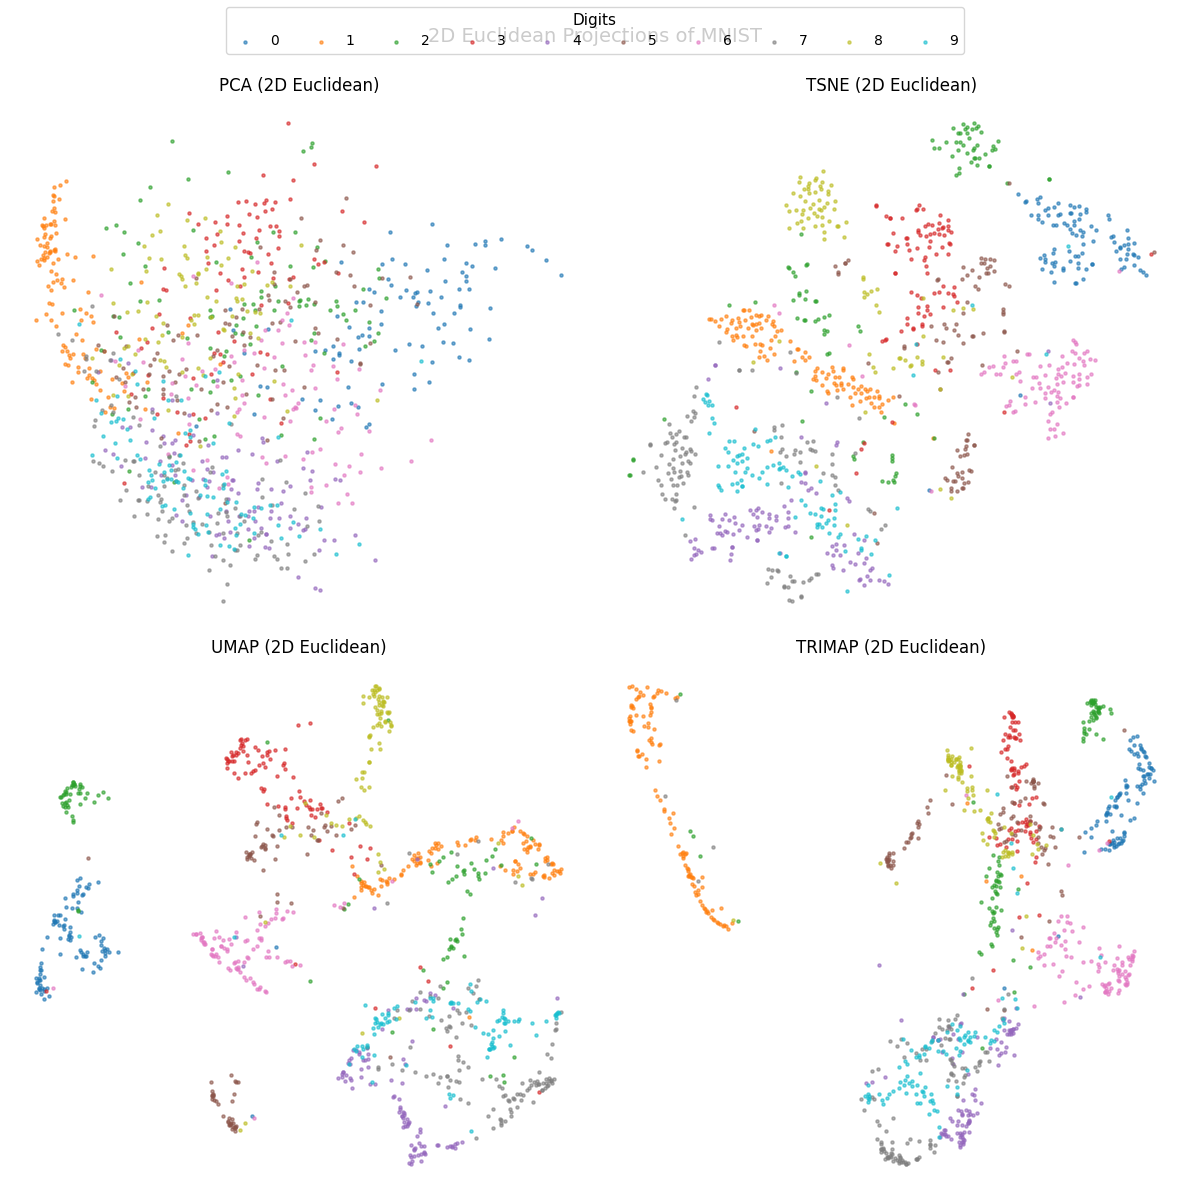

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from trimap import TRIMAP
from tensorflow.keras.datasets import mnist

# Load MNIST and preprocess
(X, y), (_, _) = mnist.load_data()
X = X[:1000].reshape(1000, -1).astype(np.float32) / 255.0
y = y[:1000]

# Dimensionality reduction methods
methods = {
    "pca": PCA(n_components=2),
    "tsne": TSNE(n_components=2, random_state=42),
    "umap": umap.UMAP(n_components=2, random_state=42),
    "trimap": TRIMAP(n_dims=2)
}

# Plot setup
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
axs = axs.flatten()
handles = []
labels = []

for i, (name, reducer) in enumerate(methods.items()):
    X_2d = reducer.fit_transform(X)
    ax = axs[i]

    # Only collect handles once (for shared legend)
    if i == 0:
        for digit in range(10):
            idx = (y == digit)
            sc = ax.scatter(X_2d[idx, 0], X_2d[idx, 1], s=5, alpha=0.6, label=str(digit))
            handles.append(sc)
            labels.append(str(digit))
    else:
        for digit in range(10):
            idx = (y == digit)
            ax.scatter(X_2d[idx, 0], X_2d[idx, 1], s=5, alpha=0.6)

    ax.set_title(f"{name.upper()} (2D Euclidean)")
    ax.axis('off')

# One shared legend
fig.legend(handles, labels, loc='upper center', ncol=10, title="Digits", fontsize=10, title_fontsize=11)

plt.suptitle("2D Euclidean Projections of MNIST", fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

#used for general view of d.r. tehcniques //